<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/Proving_Universality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit
%pip install pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.6 MB/s eta 0:00:00
  Created wheel fo

# Proving Universality


## Introduction

Back in the day, long before computers became an integral part of our lives, a brilliant mind named Alan Turing pondered a series of profound questions. He yearned to uncover the true capabilities of computers and the limits of what could be accomplished within the realm of computation. Little did he know that his quest would shape the future of computing as we know it today! 🎓💡

To truly grasp the essence of these questions, we must strip away all the glitzy screens, speakers, and fancy input devices from our classical computers. What remains is the core machinery: a humble device adept at converting input bit strings into corresponding output bit strings. If this device can handle any input and churn out any desired output, we deem it "universal" - a true marvel of computational prowess! 🌐🌟

But wait, the plot thickens! Enter quantum computers 🚪🔮 - the enigmatic stars of our digital revolution! Just like their classical counterparts, quantum computers also take input states and transform them into output states. Hence, we can define universality in a similar vein. To unveil the secrets of this intriguing realm and understand when universality can be achieved, we'll dive into the matrix representation of our quantum gates. Exciting, right? But, don't worry, we'll gently brush up on a few fundamental techniques along the way! 🧠📚

So, buckle up, dear readers! 🛡️📝 Our quest to unlock the hidden potential of quantum computers is about to commence, and it promises to be nothing short of mind-blowing! Get ready to embrace the future of computation and witness the birth of revolutionary technologies! 🌌🚀🔬

## Fun With Matrices


### Matrices as Outer Products


In previous blogs we have calculated many inner products, such as $⟨0|0⟩ = 1$. These combine a bra and a ket to give us a single number. We can also combine them in a way that gives us a matrix, simply by putting them in the opposite order. This is called an outer product, and works by standard matrix multiplication. For example

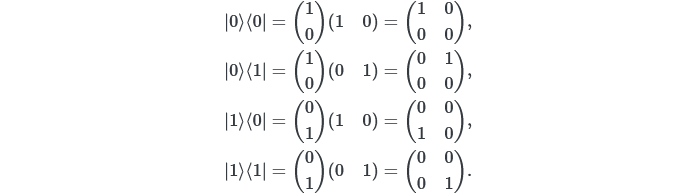

This also means that we can write any matrix purely in terms of outer products. In the examples above, we constructed the four matrices that cover each of the single elements in a single-qubit matrix, so we can write any other single-qubit matrix in terms of them.

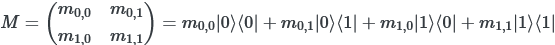

This property also extends to matrices for any number of qubits,$n$ . We simply use the outer products of the corresponding $n$-bit strings.

### Unitary and Hermitian Matrices

The Hermitian conjugate $M^{\dagger}$ of a matrix $M$ is the combination of the transpose (replace the bottom left element with the top right, and so on) and the complex conjugate of each element. Two families of matrices that are very important to quantum computing are defined by their relationship with the Hermitian conjugate. One is the family of unitary matrices, for which

Screenshot 2023-07-25 at 16-30-45 Proving Universality.png

This means that the Hermitian conjugate of a unitary is its inverse: another unitary $U^{\dagger}$
with the power to undo the effects of $U$. All gates in quantum computing, with the exception of measurement and reset operations, can be represented by unitary matrices.

Another consequence of unitarity is that it preserves the inner product between two arbitrary states. Specifically, take two states $|\psi_0⟩$
and $|\psi_1⟩$. The inner product of these is $⟨\psi_0|\psi_1⟩$
. If we apply the same unitary $U$ to both, the inner product of the resulting states is exactly the same,

Screenshot 2023-07-25 at 16-32-22 Proving Universality.png


This property provides us with a useful way of thinking about these gates. It means that for any set of states $\{|\psi_j⟩\}$
that provide an orthonormal basis for our system, the set of states $\{|\phi_j⟩ = U|\psi_j⟩\}$
will also be an orthonormal basis. The unitary can then be thought of as a rotation between these bases, and can be written accordingly as

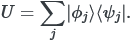

This is essentially the quantum version of the 'truth tables' that describe the action of classical Boolean gates.

The other important family of matrices are the Hermitian matrices. These are those that are unaffected by the Hermitian conjugate

Screenshot 2023-07-25 at 16-35-59 Proving Universality.png

The matrices $X,Y ,Z$ and are examples of Hermitian matrices that you've already seen (coincidentally, they are also all unitary since they are their own inverses).

All unitary matrices and Hermitian matrices have the property of being diagonalizable. This means that they can be written in the form

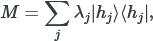

where the $\lambda_j$
are the eigenvalues of the matrix and $|h_j⟩$
are the corresponding eigenstates.

For unitaries, applying the $UU^{\dagger} = 1$
condition in this diagonal form implies that $\lambda_i \lambda_j^* = 1$
. The eigenvalues are therefore always complex numbers of magnitude 1, and so can be expressed $e^{\iota h_j}$
for some real value $h_j$
. For Hermitian matrices the condition $H = H^{\dagger}$
implies $\lambda_i = \lambda_j^*$
, and hence that all eigenvalues are real.

These two types of matrices therefore differ only in that one must have real numbers for eigenvalues, and the other must have complex exponentials of real numbers. This means that, for every unitary, we can define a corresponding Hermitian matrix. For this we simply reuse the same eigenstates, and use the $h_j$
from each $e^{\iota h_j}$
as the corresponding eigenvalue.

Similarly, for each Hermitian matrix there exists a unitary. We simply reuse the same eigenstates, and exponentiate the $h_j$
to create the eigenvalues $e^{\iota h_j}$
. This can be expressed as

Screenshot 2023-07-25 at 16-39-12 Proving Universality.png

Here we have used the standard definition of how to exponentiate a matrix, which has exactly the properties we require: preserving the eigenstates and exponentiating the eigenvalues.

### Pauli Decomposition


As we saw above, it is possible to write matrices entirely in terms of outer products.


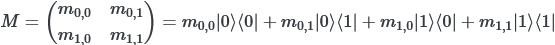


Now we will see that it is also possible to write them completely in terms of Pauli operators. For this, the key thing to note is that


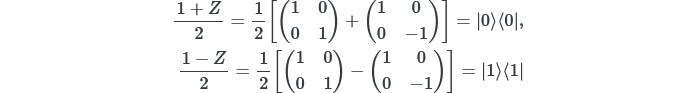


This shows that $|0⟩ ⟨0|$ and $|1⟩ ⟨1|$ can be expressed using the identity matrix and $Z$ . Now, using the property that $X|0⟩ = |1⟩$, we can also produce

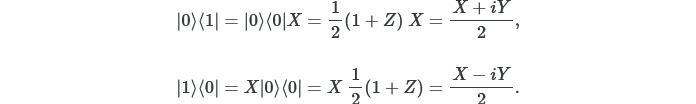

Since we have all the outer products, we can now use this to write the matrix in terms of Pauli matrices:



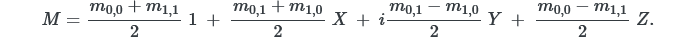

This example was for a general single-qubit matrix, but the corresponding result is true also for matrices for any number of qubits. We simply start from the observation that

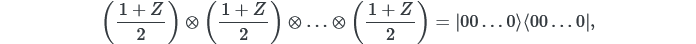)

and can then proceed in the same manner as above. In the end it can be shown that any matrix can be expressed in terms of tensor products of Pauli matrices:

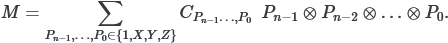

For Hermitian matrices, note that the coefficients $C_{P_{n-1},.....P_0}$
here will all be real.

## Defining Universality


Just as each quantum gate can be represented by a unitary, so too can we describe an entire quantum computation by a (very large) unitary operation. The effect of this is to rotate the input state to the output state.

One possible special case of this is that the input and output states describe bit strings expressed in quantum form. The mapping of each input $x$ to its output $f(x)$ could be described by some (reversible) classical computation. Any such computation could therefore be expressed as a unitary.



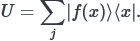

The concept of universality in quantum computing is a fascinating journey into the realm of endless possibilities. If we could successfully implement any conceivable unitary operation, it would signify the achievement of universality akin to that of standard digital computers.

A unique scenario arises when the input and output states correspond to the description of a physical system, and the computation's purpose is to simulate the dynamic behavior of that system. While this problem is impractical for classical computers, it emerges as a natural application for quantum computers. In this context, the unitary transformation applied mirrors the time evolution of the system, with the associated Hermitian matrix representing the system's Hamiltonian. Thus, the ability to achieve any unitary operation enables the simulation of diverse time evolutions and empowers us to engineer the effects of any Hamiltonian.

Drawing from these insightful observations, we can define the essence of universality for quantum computers. It simply entails the capability to achieve any desired unitary operation, irrespective of the number of qubits involved. Such a feat not only grants us the ability to replicate any task that a digital computer can handle but also opens the gateway to simulate any quantum system. It encapsulates the full spectrum of possibilities that quantum computing holds, allowing us to explore the uncharted territories of this promising frontier.

## Basic Gate Sets

Whether or not we can build any unitary from a set of basic gates depends greatly on what basic gates we have access to. For every possible realization of fault-tolerant quantum computing, there is a set of quantum operations that are most straightforward to realize. Often these consist of single- and two-qubit gates, most of which correspond to the set of so-called Clifford gates. This is a very important set of operations, which do a lot of the heavy-lifting in any quantum algorithm.

### Clifford Gates

To understand Clifford gates, let's start with an example that you have already seen many times: the Hadamard.

Screenshot 2023-07-25 at 16-45-12 Proving Universality.png


This gate is expressed above using outer products, as described above. When expressed in this form, its famous effect becomes obvious: it takes $|0⟩$, and rotates it to $|+⟩$. More generally, we can say it rotates the basis states of the z measurement,$\{|0⟩,|1⟩\}$ , to the basis states of the x measurement,$\{|+⟩,|-⟩\}$  , and vice versa.

In this way, the effect of the Hadamard is to move information around a qubit. It swaps any information that would previously be accessed by an x measurement with that accessed by a z measurement.

The Hadamard can be combined with other gates to perform different operations, for example:

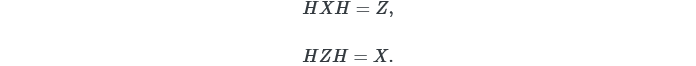

By doing a Hadamard before and after an $X$ , we cause the action it previously applied to the z basis states to be transferred to the x basis states instead. The combined effect is then identical to that of a $Z$ . Similarly, we can create an $X$ from Hadamards and a $Z$.

Similar behavior can be seen for the $S$ gate and its Hermitian conjugate,



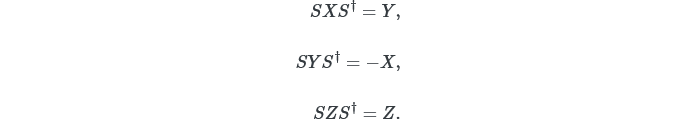

This has a similar effect to the Hadamard, except that it swaps $X$ and $Y$ instead of $X$ and $Z$. In combination with the Hadamard, we could then make a composite gate that shifts information between y and z.

This property of transforming Paulis into other Paulis is the defining feature of Clifford gates. Stated explicitly for the single-qubit case: if $U$ is a Clifford and $P$ is a Pauli,$UPU^{†}$ will also be a Pauli. For Hermitian gates, like the Hadamard, we can simply use $UPU$.

Further examples of single-qubit Clifford gates are the Paulis themselves. These do not transform the Pauli they act on. Instead, they simply assign a phase of $-1$ to the two that they anticommute with. For example,

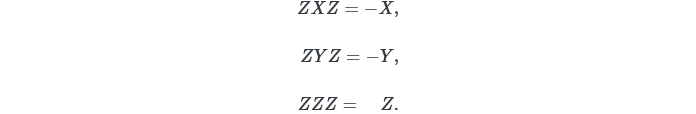

You may have noticed that a similar phase also arose in the effect of $S$ the gate. By combining this with a Pauli, we could make a composite gate that would cancel this phase, and swap $X$ and $Y$ in a way more similar to the Hadamard's swap of $X$ and $Z$.

For multiple-qubit Clifford gates, the defining property is that they transform tensor products of Paulis to other tensor products of Paulis. For example, the most prominent two-qubit Clifford gate is the CNOT. The property of this that we will make use of in this chapter is

Screenshot 2023-07-25 at 16-49-52 Proving Universality.png

This effectively 'copies' an $X$ from the control qubit over to the target.

The process of sandwiching a matrix between a unitary and its Hermitian conjugate is known as conjugation by that unitary. This process transforms the eigenstates of the matrix, but leaves the eigenvalues unchanged. The reason why conjugation by Cliffords can transform between Paulis is because all Paulis share the same set of eigenvalues.

### Non-Clifford Gates

The Clifford gates are very important, but they are not powerful on their own. In order to do any quantum computation, we need gates that are not Cliffords. Three important examples are arbitrary rotations around the three axes of the qubit,$R_x(\theta)
,R_y(\theta)$
and $R_z(\theta)$
.

Let's focus on $R_x(\theta)$
. As we saw above, any unitary can be expressed in an exponential form using a Hermitian matrix. For this gate, we find

Screenshot 2023-07-25 at 16-51-11 Proving Universality.png

The last section also showed us that the unitary and its corresponding Hermitian matrix have the same eigenstates. In this section, we've seen that conjugation by a unitary transforms eigenstates and leaves eigenvalues unchanged. With this in mind, it can be shown that

Screenshot 2023-07-25 at 16-51-28 Proving Universality.png

By conjugating this rotation by a Clifford, we can therefore transform it to the same rotation around another axis. So even if we didn't have a direct way to perform $R_y(\theta)$
and $R_z(\theta)$
, we could do it with $R_x(\theta)$
combined with Clifford gates. This technique of boosting the power of non-Clifford gates by combining them with Clifford gates is one that we make great use of in quantum computing.

### Expanding The Gate Set

As another example of combining $R_x(\theta)$
with Cliffords, let's conjugate it with a CNOT

Screenshot 2023-07-25 at 16-54-59 Proving Universality.png

This transforms our simple, single-qubit rotation into a much more powerful two-qubit gate. This is not just equivalent to performing the same rotation independently on both qubits. Instead, it is a gate capable of generating and manipulating entangled states.

We needn't stop there. We can use the same trick to extend the operation to any number of qubits. All that's needed is more conjugates by the CNOT to keep copying the $X$ over to new qubits.

Furthermore, we can use single-qubit Cliffords to transform the Pauli on different qubits. For example, in our two-qubit example we could conjugate by $S$ on the qubit on the right to turn the $X$ there into a $Y$:



Screenshot 2023-07-25 at 16-55-46 Proving Universality.png

With these techniques, we can make complex entangling operations that act on any arbitrary number of qubits, of the form


Screenshot 2023-07-25 at 16-56-02 Proving Universality.png

This all goes to show that combining the single and two-qubit Clifford gates with rotations around the x axis gives us a powerful set of possibilities. What's left to demonstrate is that we can use them to do anything.

## Proving Universality


As for classical computers, we will need to split this big job up into manageable chunks. We'll need to find a basic set of gates that will allow us to achieve this. As we'll see, the single- and two-qubit gates of the last section are sufficient for the task.

Suppose we wish to implement the unitary


Screenshot 2023-07-25 at 16-57-01 Proving Universality.png


but the only gates we have are $R_x(\theta$)
and $R_z(\theta)$
. The best way to solve this problem would be to use Euler angles. But let's instead consider a different method.

The Hermitian matrix in the exponential for $U$ is simply the sum of those for the $R_x(\theta)$
and $R_z(\theta)$
rotations. This suggests a naive approach to solving our problem: we could apply $R_z(2b)$
followed by $R_x(2a)$
. Unfortunately, because we are exponentiating matrices that do not commute, this approach will not work.

Screenshot 2023-07-25 at 16-58-36 Proving Universality.png

However, we could use the following modified version:


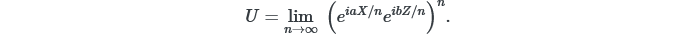


Here we split $U$ up into $n$ small slices. For each slice, it is a good approximation to say that


Screenshot 2023-07-25 at 16-59-22 Proving Universality.png


The error in this approximation scales as $1/n^2$
. When we combine the slices, we get an approximation of our target unitary whose error scales as $1/n$. So by simply increasing the number of slices, we can get as close to $U$ as we need. Other methods of creating the sequence are also possible to get even more accurate versions of our target unitary.

The power of this method is that it can be used in complex cases than just a single qubit. For example, consider the unitary



Screenshot 2023-07-25 at 17-00-00 Proving Universality.png

We know how to create the unitary $e^{\iota \theta/2 X \otimes X \otimes X}$
from a single qubit $R_x(\theta)$
and two controlled-NOTs.

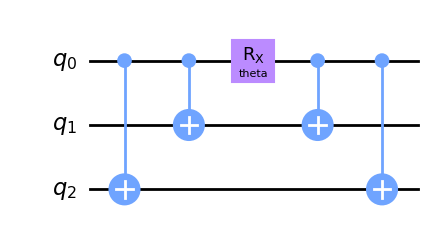

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
theta = Parameter('theta')

qc = QuantumCircuit(3)
qc.cx(0,2)
qc.cx(0,1)
qc.rx(theta,0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw('mpl')

With a few Hadamards, we can do the same for $e^{\iota \theta/2 Z \otimes Z \otimes Z}$
.

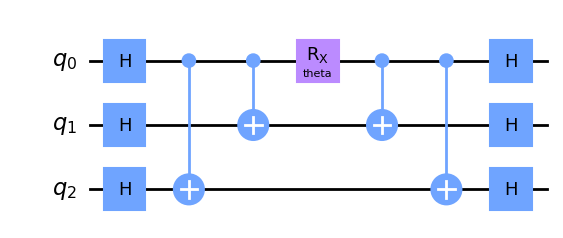

In [3]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,2)
qc.cx(0,1)
qc.rx(theta,0)
qc.cx(0,1)
qc.cx(0,2)
qc.h(2)
qc.h(1)
qc.h(0)
qc.draw('mpl')

This gives us the ability to reproduce a small slice of our new, three-qubit $U$:



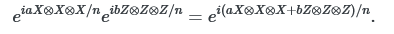

As before, we can then combine the slices together to get an arbitrarily accurate approximation of $U$.

This method continues to work as we increase the number of qubits, and also the number of terms that need simulating. Care must be taken to ensure that the approximation remains accurate, but this can be done in ways that require reasonable resources. Adding extra terms to simulate, or increasing the desired accuracy, only require the complexity of the method to increase polynomially.

Methods of this form can reproduce any unitary $U = e^{\iota H}$ for which $H$ can be expressed as a sum of tensor products of Paulis. Since we have shown previously that all matrices can be expressed in this way, this is sufficient to show that we can reproduce all unitaries. Though other methods may be better in practice, the main concept to take away from this chapter is that there is certainly a way to reproduce all multi-qubit unitaries using only the basic operations found in Qiskit. Quantum universality can be achieved!

This gate set is not the only one that can achieve universality. For example it can be shown that just the Hadamard and Toffoli are sufficient for universality. Multiple other gates sets have also been considered and been proven universal, each motivated by different routes toward achieving the gates fault-tolerantly.

Everything we have discussed in this book follows the circuit model of computation. However, the circuit model is not the only universal model of quantum computation. Other forms of quantum computation such as adiabatic quantum computing or measurement based quantum computing exist. The fact that they are universal means that it has been proven that there is a mapping in polynomial time and resources from the circuit model to these other models of computation. These other models often leverage other quantum mechanical properties in order to perform their computation. While these other forms of quantum computation exist, it is important to note that the benefits of each concern only physical and hardware problems. Since a universal model of quantum computation can perform any quantum algorithm, we need only stick with the circuit model and can ignore other universal models for our discussion.

There are other forms of quantum computation that are not universal, but are applicable to specific applications. For example quantum annealing may be useful for optimization and sampling problems. Annealing is the process of heating a metal to a high temperature and then allowing it to cool down slowly. This process causes molten metal to flow over the surface of the metal piece and redistribute itself; changing many properties of the metal in question. Quantum annealing is analogous to the physical process of annealing in some sense. It involves encoding problems into an energy landscape of sorts and then letting a quantum state explore the landscape. While normal waves may get trapped in troughs which are lower than their surroundings (local minima), quantum effects increase the speed at which the quantum states find the true lowest point on the landscape (global minima).

In [4]:
import qiskit.tools.jupyter
%qiskit_version_table